# Faktorska i klasterska analiza

>U ovoj svesci ćemo koristiti dva tipa analize podataka: faktorsku i klastersku analizu daa bismo prikazali kako skup podataka sa mnoštvom promenljivih možemo da svedemo na nekoliko najvažnijih koje znamo kako da protumačimo i kako na osnovu vrednosti tih najvažnijih promenljivih možemo da klasifikujemo objekte. Primer je urađen za klasifikaciju država prema stepenu ekonomskog razvoja. 

Pravljenje rang-lista je jednostavno kada objekte treba poređati po veličini jednog parametra. Mi, međutim, često pravimo rang-liste za vrlo složene i apstraktne konstrukte kao što su konkurentnost privrede, kvalitet života, inovativnost itd. Da bi takve liste bile nešto više od subjektivnog rangiranja potrebno je da izaberemo najvažnije karakteristike, da procenimo koliko su važne, da li su možda međusobno previše zavisne i da smislimo odgovarajuću metriku.

Svetska banka klasifikuje države i ekonomije prema stepenu ekonomskog razvoja u [četiri grupe](https://blogs.worldbank.org/opendata/new-country-classifications-income-level-2019-2020): visoku, gornju-srednju, donju-srednju i nisku. Za to koristi samo jedan parametar: bruto nacionalni proizvod (BNP, eng. GNP - _Gross national product_) po glavi stanovnika. Nesumnjivo, prosečni proizvod stanovnika određene teritorije jeste važan pokazatelj njene razvijenosti. Ipak, postoje velike razlike među državama sa sličnim BNP po glavi stanovnika. Na taj način u istu grupu stavlja npr. Norvešku i Saudijsku Arabiju ili Kinu i Angolu. Jasno nam je da samo jedan parametar ne može da bude dobra osnova za dobru klasifikaciju prema ekonomskom razvoju. Takođe poređenje ekonomskog razvoja sa indikatorima iz drugih oblasti neće dati značajne rezultate jer su grupe previše grubo određene. Zamislite da poredimo postignuće na PISA testu za različite grupe zemalja gde su u istoj grupi npr. Finska i Oman. Varijansa bi bila prevelika da bi poređenje imalo smisla. Potrebno nam je još parametara.

Na sajtu Svetske banke postoji [kolekcija različitih indikatora](https://data.worldbank.org/indicator) o stepenu razvoja svih država i ekonomija koji se prikupljaju iz različitih izvora i po različitoj metodologiji. Sistematizacija ovih podataka nije jednostavan posao jer ne postoje svi podaci za sve zemlje i nema istraživanja za svaku godinu. Zato je potrebno napraviti odabir indikatora i kriterijum po kom ih povezujemo.

## Podaci

Za ovu vežbu iskoristiti fajl "countries data.csv" sa 29 indikatora razvoja koje je sakupio i priredio [Zedric Cheung](https://towardsdatascience.com/factor-analysis-cluster-analysis-on-countries-classification-1bdb3d8aa096). Ovi indikatori opisuju ne samo ekonomski već i društveni razvoj. U nedostatku podataka za aktuelnu godinu, uzeti su najnoviji dostupni podaci. Da bismo izbegli moguću pristrasnost zbog nesrazmernih vrednosti za određene indikatore, kao što su npr. BNP ili broj stanovnika, izabrani su samo relativni indikatori i indikatori rasta koji se uglavnom izražavaju u procentima.

```{admonition} Napomena
Indikatori su odabrane promenljive za koje postoji saglasnost da predstavljaju relevantne i proverljive podatke o stanju ili o promeni stanja sistema. Dostupnost električne energije u ruralnim oblastima je, na primer, važan podatak o tome koliko su razvijene ruralne sredine ili kakav je njihov ekonomski potencijal. Indikatori se drugačije nazivaju pokazateljima.
```

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('data/df_final.csv',index_col=0)

In [3]:
df.head()

,Afghanistan,Algeria,Angola,Argentina,Armenia,Australia,Austria,Azerbaijan,"Bahamas, The",Bahrain,...,Ukraine,United Kingdom,United States,Uruguay,Uzbekistan,"Venezuela, RB",Vietnam,"Yemen, Rep.",Zambia,Zimbabwe
"Access to electricity, rural (% of rural population)",64.573354,99.764565,3.815070,98.136760,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,99.696927,57.411509,4.697572,10.949313
"Access to electricity, urban (% of urban population)",100.000000,100.000000,73.674667,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,85.000000,77.245483,85.333015
"Agriculture, forestry, and fishing, value added (% of GDP)",22.810663,9.851693,6.507493,6.052918,18.434763,2.278906,1.254721,5.366264,0.920219,0.274789,...,8.786389,0.672181,1.333514,7.616201,29.496585,4.902550,17.963586,7.867396,8.226535,7.144479
"Birth rate, crude (per 1,000 people)",35.706000,25.538000,43.182000,17.698000,14.979000,13.200000,9.600000,17.900000,14.340000,15.426000,...,10.800000,12.000000,12.500000,14.192000,23.300000,19.394000,17.315000,32.735000,38.645000,34.978000
CO2 emissions (metric tons per capita),0.253728,3.735803,1.664741,4.588230,1.898719,15.391109,6.892180,3.920792,6.341980,23.477363,...,5.046563,6.497341,16.416576,1.984241,3.420723,6.161192,1.824532,0.955251,0.292412,0.891739


Tabela je, evidentno, napravljena tako da su indikatori prikazani po redovima, a države po kolonama. To nam nije zgodno za funkcije poput `corr()` koje koriste kolone kao argumente. Zato ćemo pomoću funkcije `T` transponovati _DataFrame_, tj. okrenuti tabelu tako da zamenimo redove i kolone.

In [4]:
df=df.T

In [5]:
df.head()

,"Access to electricity, rural (% of rural population)","Access to electricity, urban (% of urban population)","Agriculture, forestry, and fishing, value added (% of GDP)","Birth rate, crude (per 1,000 people)",CO2 emissions (metric tons per capita),Current health expenditure (% of GDP),"Death rate, crude (per 1,000 people)",Diabetes prevalence (% of population ages 20 to 79),Employment in agriculture (% of total employment) (modeled ILO estimate),Employment in industry (% of total employment) (modeled ILO estimate),...,Merchandise trade (% of GDP),Mobile cellular subscriptions (per 100 people),"Mortality rate, infant (per 1,000 live births)","PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)",People using at least basic drinking water services (% of population),Rural population (% of total population),Secure Internet servers (per 1 million people),"Services, value added (% of GDP)",Trade in services (% of GDP),"Vulnerable employment, total (% of total employment) (modeled ILO estimate)"
Afghanistan,64.573354,100.000000,22.810663,35.706,0.253728,8.561907,7.141,9.2,42.839001,18.162001,...,40.512797,57.271068,47.9,56.910808,56.169645,76.052,43.447835,52.990865,13.874704,79.726002
Algeria,99.764565,100.000000,9.851693,25.538,3.735803,5.267481,4.709,6.7,9.856000,30.733999,...,55.489295,108.808940,20.1,38.884011,93.055192,31.764,63.325702,42.871985,7.184300,26.992999
Angola,3.815070,73.674667,6.507493,43.182,1.664741,2.645608,9.454,4.5,50.380001,8.122000,...,60.221450,49.793223,51.6,32.388505,52.757347,39.472,10.799300,46.813928,18.281924,65.995001
Argentina,98.136760,100.000000,6.052918,17.698,4.588230,8.396563,7.651,5.9,0.092000,21.410999,...,25.486412,143.566834,8.8,13.311834,98.930412,9.010,1628.591391,52.940543,5.972423,21.804999
Armenia,100.000000,100.000000,18.434763,14.979,1.898719,9.375878,9.796,6.1,29.638000,17.174999,...,50.992665,118.421714,11.0,32.528118,99.261631,36.660,271.324898,47.413044,28.889232,38.667999


Sada su države po vrstama, a indikatori po kolonama pa možemo da vidimo spisak svih odabranih indikatora.

In [6]:
indicators=list(df.columns)
countries=list(df.index)

In [7]:
indicators

['Access to electricity, rural (% of rural population)',
 'Access to electricity, urban (% of urban population)',
 'Agriculture, forestry, and fishing, value added (% of GDP)',
 'Birth rate, crude (per 1,000 people)',
 'CO2 emissions (metric tons per capita)',
 'Current health expenditure (% of GDP)',
 'Death rate, crude (per 1,000 people)',
 'Diabetes prevalence (% of population ages 20 to 79)',
 'Employment in agriculture (% of total employment) (modeled ILO estimate)',
 'Employment in industry (% of total employment) (modeled ILO estimate)',
 'Employment to population ratio, ages 15-24, total (%) (modeled ILO estimate)',
 'GDP growth (annual %)',
 'GDP per capita growth (annual %)',
 'Immunization, DPT (% of children ages 12-23 months)',
 'Individuals using the Internet (% of population)',
 'Industry (including construction), value added (% of GDP)',
 'Labor force participation rate for ages 15-24, female (%) (modeled ILO estimate)',
 'Labor force participation rate for ages 15-24, 

## Faktorska analiza

Osnovna namena faktorske analize jeste da opiše međusobne veze nekoliko promenljivih koristeći manji broj dimenzija koje ne možemo direktno da posmatramo i merimo. Ove dimenzije nazivamo faktorima.

```{admonition} Napomena
Reč faktor smo ranije koristili da označimo uzrok neke pojave. Sada ga koristimo u nešto drugačijem značenju koje se odnosi dimenziju, odnosno promenljivu veličinu koja se tiče uzroka, a čiju vrednost ne možemo direkno da merimo. Mogli bismo da kažemo, na primer, da je nečija posvećenost poslu faktor njegovog poslovnog uspeha. Ako tu posvećenost predstavimo kao dimenziju po kojoj bismo mogli da poredimo one koji su manje ili više posvećeni, onda bi to bio faktor u onom drugom smislu reči. Posvećenost, međutim, ne možemo direktno da merimo. Najbolje što možemo je da je predstavimo kao kombinaciju različitih indikatora posvećenosti. 
```

Tabela __indicators__ ima 29 indikatora koji nisu svi nezavisni. Iza njih se, verovatno, krije svega nekoliko faktora koji najvećim delom utiču na vrednosti indikatora. Faktorska analiza može da nam pokaže koji su to faktori najvažniji i šta ih čini. Bez namere da ovde ulazimo u detalje faktorske analize, iskoristićemo ovaj način analize za redukciju broja indikatora kojima opisujemo ekonomiju jedne zemlje. Umesto mnoštva indikatora pokušaćemo da identifikujemo i opišemo samo najvažnije faktore. Ovaj postupak se zove smanjenje dimenzionalnosti (eng. _dimensionality reduction_).

Faktorska analiza podrazumeva linearnu vezu promenljivih i zajedničkih faktora. Posmatrane promenljive se modeliraju kao linearne kombinacije faktora i statističkih grešaka. Ova pretpostavka se koristi za objašnjenje varijanse posmatrane promenljive i uočavanje faktora. Ukoliko postoji jaka nelinearna veza između promenljivih, onda faktorska analiza neće biti adekvatna.

Faktorska analiza, takođe, pretpostavlja da promenljive mogu da budu međusobno zavisne. Na taj način promenljive mogu da se grupišu prema nekom zajedničkom svojstvu. U tom slučaju sve promenljive iz jedne grupe imaju međusobno visoke korelaciije dok su korelacije sa promenljivim iz drugih grupa niske. O svakoj grupi ovde možemo da razmišljamo kao o reprezentaciji istog osnovnog konstrukta ili faktora.

### Korelaciona matrica

Pre nego što krenemo u dublju analizu, dobro je pogledati kako indikatori međusobno koreliraju. To može da nam pokaže korelaciona matrica.

<AxesSubplot:>

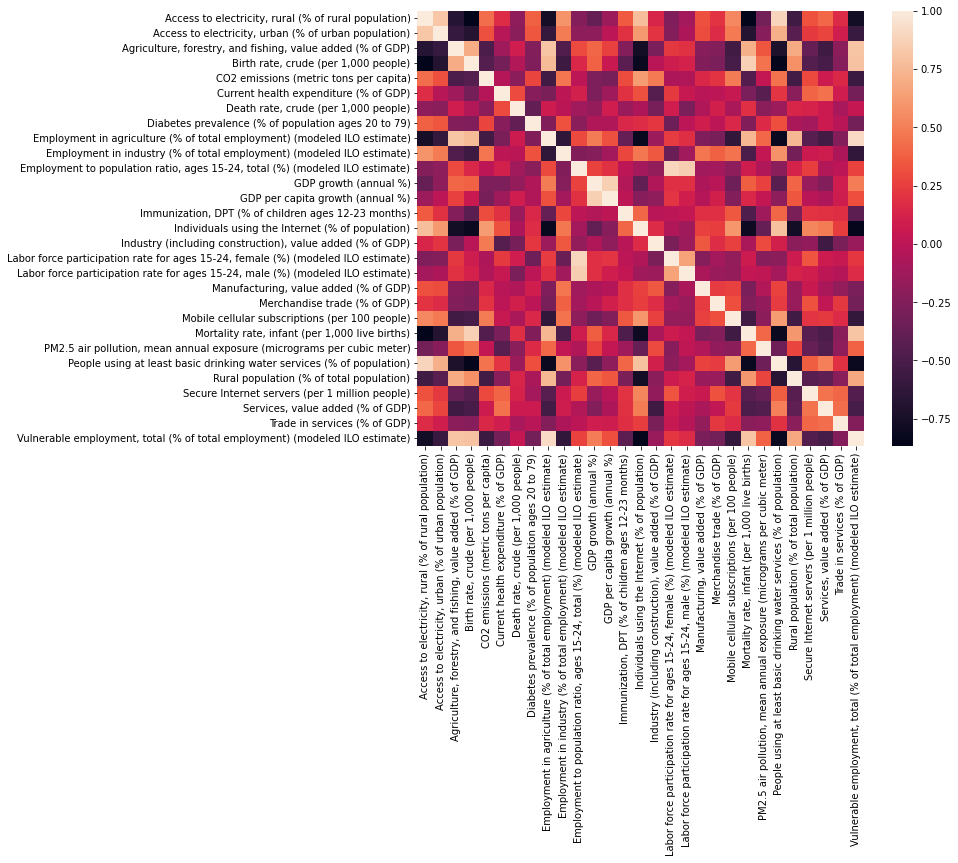

In [8]:
plt.figure(figsize=(10,8))
corrMatrix = df.corr()
sns.heatmap(corrMatrix)

Odavde vidimo mnoge interesantne veze među promenljivim. Za neke od njih možemo da nađemo logično objašnjenje. Vidimo npr. pozitivnu korelaciju između dostupnosti električne energije i procenta ljudi koji koriste usluge osnovnog snabdevanja vodom ili negativnu korelaciju između udela ruralne populacije i udela populacije koja koristi internet. Ove dve veze nisu iznenađenje i za njih bismo mogli da nađemo prihvatljivo objašnjenje.

Za faktorsku analizu, međutim, nije neophodno da imamo objašnjenje uzročno-posledične veze između dve promenljive. Za analizu je važno da veza postoji, da može da se izmeri koliko je ona jaka i da na osnovu toga mogu da se grupišu. Iz zajedničkih svojstava tih grupa bi trebalo da prepoznamo faktore.

Za kod koji sledi koristićemo biblioteku __factor_analyzer__ koju uglavnom nemamo u okruženju. Ako je već niste instalirali, možete to da uradite pomoću koda u sledećoj ćeliji. Naravno, uklonite # pre nego što pokrenete kod.

In [9]:
# pip install factor_analyzer

Da bismo videli koji je faktor koliko značajan izračunaćemo njihove jedinstvene vrednosti (_eigenvalues_). Pomoću funkcije `FactorAnalyzer()` ćemo konstruisati objekat __fa__ čije elemente dobijamo fitovanjem podataka datih u tabeli __df__ pomoću funkcije `fit()`. 

Funkcija `get_eingenvalues()` za objekat __fa__ vraća dva niza: originalne jedinstvene vrednosti i jedinstvene vrednosti za zajednički faktor. Nas će u ovom primeru interesovati samo prvi vraćeni niz __ev__.

In [10]:
from factor_analyzer import FactorAnalyzer

In [11]:
fa = FactorAnalyzer()
fa.fit(df)

ev, v = fa.get_eigenvalues()

In [12]:
ev

array([10.63672587,  3.67107979,  2.44460081,  1.87141039,  1.57578863,
        1.36463179,  0.97581184,  0.80623313,  0.76408057,  0.6737155 ,
        0.58463794,  0.54760286,  0.46188775,  0.41524039,  0.40187364,
        0.29960097,  0.27164571,  0.2577007 ,  0.20448553,  0.15339563,
        0.13474008,  0.12614355,  0.09251826,  0.07345108,  0.05858169,
        0.04268668,  0.0354787 ,  0.02998401,  0.02426649])

Dobili smo 29 jedinstvenih vrednosti za faktore koliko ima i indikatora. Ove vrednosti su već sortirane po veličini jedinstvenih vrednosti i vidimo da nemaju svi faktori isti značaj. Prvi faktor je svakako najznačajniji. Da bismo videli koliko ima značajnih faktora primenićemo Kajzerov kriterijum (_Kaiser criterion_). To znači da uzimamo samo one faktore sa jedinstvenom vrednošću većom ili jednakom 1. Pošto sedmi faktor ima jedinstvenu vrednost skoro 1 (0.976), možemo da uključimo i taj sedmi. Kad nacrtamo "_scree plot_" vidi se koje su jedinstvene vrednosti za koji faktor i gde bi trebalo da se zaustavimo.

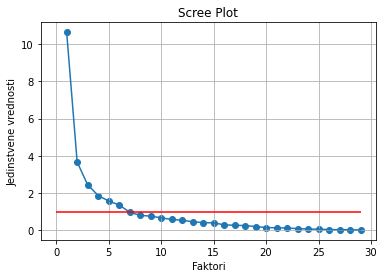

In [13]:
plt.scatter(range(1,df.shape[1]+1),ev)
plt.plot(range(1,df.shape[1]+1),ev)
plt.hlines(1, 0, df.shape[1], colors='r')
plt.title('Scree Plot')
plt.xlabel('Faktori')
plt.ylabel('Jedinstvene vrednosti')
plt.grid()
plt.show()

Uzeli smo prvih 7 faktora i sada nas interesuje za svaki indikator iz tabele __df__ koje su mu komponenente kad ga razložimo po faktorima. Opet ćemo pomoću funkcije `fit()` uraditi faktorsku analizu, samo što nas sada ne interesuju jedinstvene vrednosti nego komponente koje dobijamo funkcijom `loadings_`.


In [14]:
n=7
fa=FactorAnalyzer(n, rotation='varimax')
fa.fit(df)
loads=fa.loadings_
loads=pd.DataFrame(loads, index=df.columns)

Težine faktora za svaki indikator, odnosno komponente indikatora po faktorima, nisu ništa drugo do koeficijenti korelacije između pojedinačnih indikatora i faktora. Kvadrat tog broja pokazuje koliki deo varijanse indikatora objašnjava svaki pojedinačni faktor.

U tabeli __loads__ vidimo težine faktora za svaku promenljivu. Dostupnost električne energije u ruralnim oblastima (__Access to electricity, rural__) je najvećim delom (0.923) posledica faktora 1, dok je npr. __Employment to population ratio, ages 15-24, total (%)__ najvećim delom posledica faktora 2. 

In [15]:
loads

,0,1,2,3,4,5,6
"Access to electricity, rural (% of rural population)",0.923099,-0.103622,-0.016995,-0.075640,0.168628,0.110812,-0.114156
"Access to electricity, urban (% of urban population)",0.798886,-0.099014,0.129567,0.055812,0.195405,-0.003146,-0.159214
"Agriculture, forestry, and fishing, value added (% of GDP)",-0.795819,0.174390,0.166881,-0.114388,0.001961,-0.045754,-0.201374
"Birth rate, crude (per 1,000 people)",-0.891906,0.023063,-0.000763,0.136761,0.094165,-0.226882,-0.017734
CO2 emissions (metric tons per capita),0.452723,0.071284,-0.267657,0.389566,0.177487,0.309021,0.282098
Current health expenditure (% of GDP),0.239314,0.160355,-0.190261,-0.412832,-0.432466,0.050767,0.082409
"Death rate, crude (per 1,000 people)",-0.138158,-0.174289,-0.014640,-0.178776,-0.698574,0.120223,-0.105104
Diabetes prevalence (% of population ages 20 to 79),0.269447,-0.139315,-0.008373,-0.005002,0.567908,0.121560,-0.067806
Employment in agriculture (% of total employment) (modeled ILO estimate),-0.820959,0.145347,0.261797,0.022575,0.017465,-0.267389,-0.201548
Employment in industry (% of total employment) (modeled ILO estimate),0.496466,-0.167122,-0.057186,0.107814,0.134582,0.696404,-0.216404


Komponente pojedinačnih promenljivih možemo da prikažemo grafički pomoću funkcije `heatmap()`.

<AxesSubplot:>

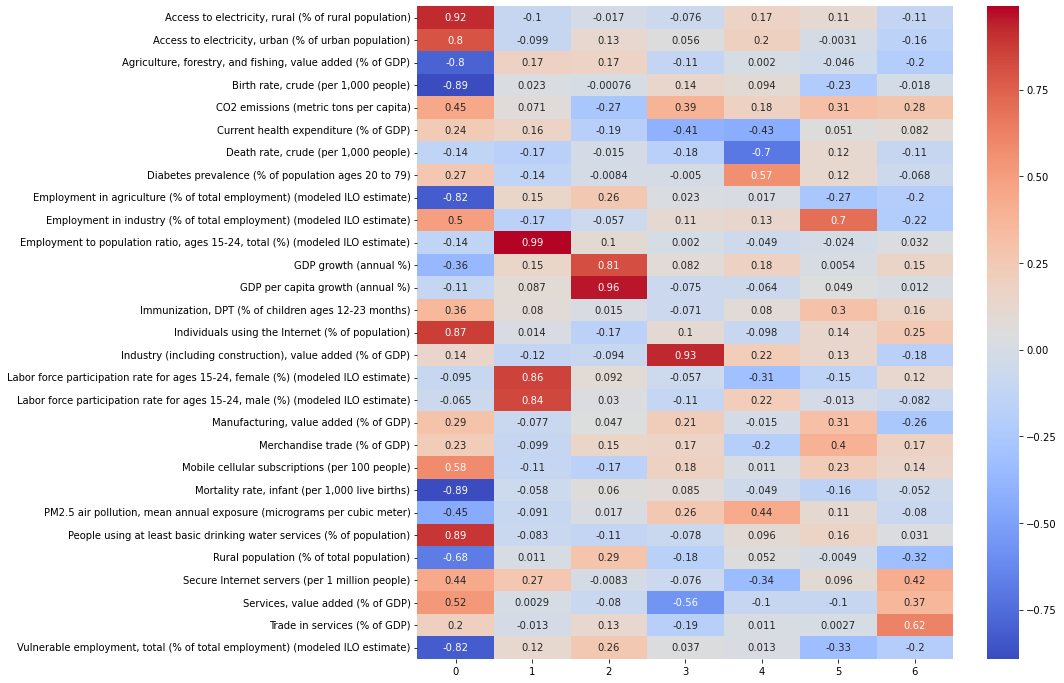

In [16]:
plt.figure(figsize=(12,12))
sns.heatmap(loads, annot=True, cmap="coolwarm")

Koliko dobro pomoću prvih sedam faktora možemo da opišemo indikatore, to kvantifikujemo pomoću udela varijanse za koju su odgovorni faktori. Za svaki faktor posebno možemo da vidimo koliki ima udeo ukupne varijanse. Kumulativni udeo nam govori koliko varijanse opisuju zajedno taj i svi prethodni faktori. Te podatke možemo da dobijemo pomoću funkcije `get_factor_variance()`. 

In [17]:
fa_var = fa.get_factor_variance()
fa_var = pd.DataFrame(fa_var, index=['SS loadings', 'Proportion Var', 'Cumulative Var'])
fa_var

,0,1,2,3,4,5,6
SS loadings,9.176603,2.777247,2.099143,1.891124,1.748366,1.401925,1.400185
Proportion Var,0.316435,0.095767,0.072384,0.065211,0.060288,0.048342,0.048282
Cumulative Var,0.316435,0.412202,0.484586,0.549797,0.610086,0.658428,0.706710


Vidimo da je izbor prvih sedam faktora objasnio 71% ukupne varijanse svih 29 indikatora.

### Tumačenje faktora

Iako su faktori apstraktni i ne možemo direktno da ih merimo, možemo da ih opišemo na osnovu veze sa pojedinačnim indikatorima. Npr. faktor 0 ima visoku korelaciju sa dostupnošću električne energije, interneta i pijaće vode. Možemo reći da ovaj faktor generalno opisuje dostupnost osnovnih komunalnih usluga. Slično možemo da prepoznamo i za ostale faktore.

Okvirno, sedam faktora ekonomskog razvoja na osnovu izabranih indikatora grubo možemo da opišemo kao:

1. faktor — Dostupnost osnovnih komunalnih usluga
2. faktor — Zapošljivost mladih
3. faktor — Ukupni ekonomski rast
4. faktor — Industrijski razvoj
5. faktor — Zdravstvena situacija
6. faktor — Mogućnosti proizvodnje i trgovine proizvedenom robom
7. faktor — Razvoj stručnih usluga

Imajte u vidu da tumačenja podataka ne moraju da budu jedinstvena, da su veoma zavisna od konteksta i da su ponekad subjektivna. Zato je važno da naglasimo na osnovu čega dajemo takvo tumačenje.

In [18]:
faktori=['Dostupnost osnovnih\n komunalnih usluga',
         'Zapošljivost mladih',
         'Ukupni ekonomski rast',
         'Industrijski razvoj',
         'Zdravstvena situacija',
         'Mogućnosti proizvodnje i\n trgovine proizvedenom robom',
         'Razvoj stručnih usluga']

## Klasterska analiza

Vratimo se sada na svih 29 indikatora. Njih možemo predstaviti kao 29 dimenzija nekog hiper-prostora u kom je definisano rastojanje između bilo koje dve tačke. Ako krenemo _bottom-up_ i tražimo države koje su međusobno nabliže, počeće da se stvaraju klasteri država sa sličnim karakteristikama.

### Hijerarhijska klasterizacija

Hijerarhijska klasterizacija je tip učenja bez nadzora koji grupiše slične tačke ili objekte u grupe koje nazivamo klasterima. Postoje dva podtipa hijerarhijske klasterizacije:
- Aglomerativna hijerarhijska klasterizacija i
- Hijerarhijska klasterizacija razdvajanjem.

Mi ćemo ovde prikazati primer korišćenja samo prvog od ova dva podtipa. Aglomerativna hijerarhijska klasterizacija ima _bottom-up_ pristup gde su svi objekti na početku zasebni klasteri koji se sukcesivno sparuju čineći sve veće klastere.

#### Standardizacija

Za uspešno uočavanje klastera potrebno je sve indikatore, bez obzira na raspon vrednosti i jedinice u kojima su dati, dovesti u ravnopravan položaj tako što im se vrednosti standardizuju. To činimo tako što originalne vrednosti indikatora zamenjujemo razlikom originalne i srednje vrednosti za taj indikator podeljenu standardnom devijacijom indikatora. To znači da su tipične standardizovane vrednosti uglavnom između -1 i +1.

In [19]:
df_std=(df-df.mean())/df.std()

Sa ovako transformisanom tabelom __df__ možemo da utvrdimo rastojanja između tačaka (država) koristeći podrazumevanu euklidsku distancu i Ward metod povezivanja klastera. Njihova klasterizacija može da se prikaže dijagramom koji nazivamo dendrogram zbog vizuelne sličnosti sa korenom drveta. Dendrogram prikazuje kako se klasteri spajaju ili razdvajaju na određenim rastojanjima. Skup tačaka može da ima različit broj klastera u zavisnosti od parametra kritičnog rastojanja koji je prikazan na y-osi. U krajnjoj liniji, izbor broja klastera je proizvoljan i vrlo često subjektivan.

In [20]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

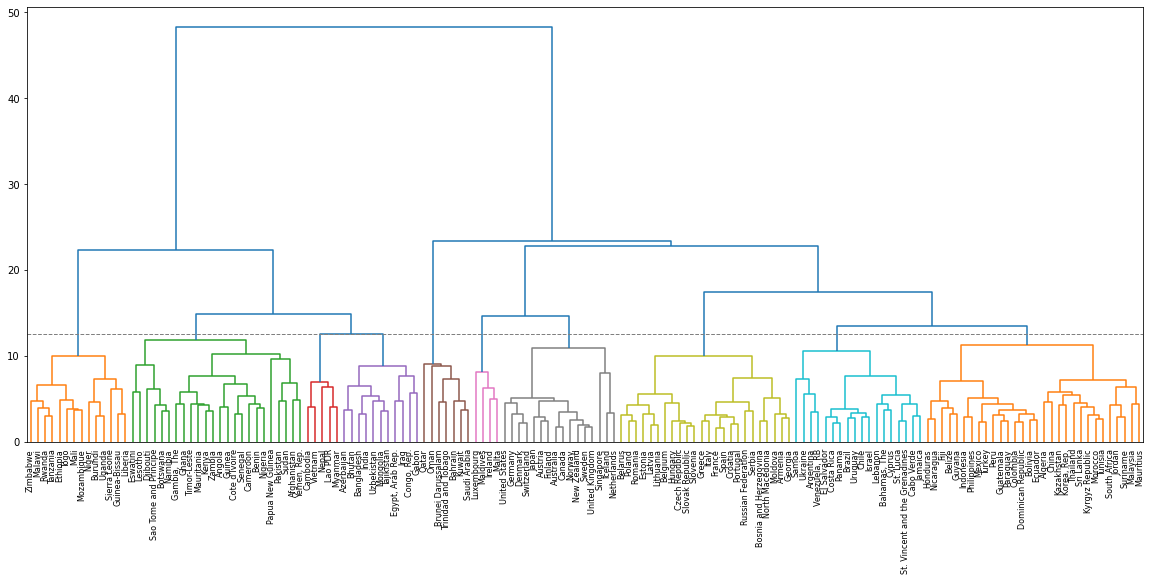

In [21]:
plt.subplots(figsize=(20,8))
dendrogram = sch.dendrogram(sch.linkage(df_std, method='ward'),leaf_rotation=90, 
                            leaf_font_size=8, color_threshold=12.5, labels=df.index)
plt.axhline(y=12.5, color='gray', lw=1, linestyle='--');

Funkcija `dendrogram()` ne vraća podatke o klasterima jer još nismo zadali kriterijum koliki su ili koliko ih ima. Za grupisanje država u klastere nam je potrebna funkcija `AgglomerativeClustering()` u kojoj ćemo zadati da hoćemo tačno 12 klastera. To odgovara visini crne isprekidane linije na gornjem grafikonu. Svaki presek ove linije sa dendrogramom definiše po jedan klaster ispod linije. Funkcija `fit_predict()` vraća niz celih brojeva koji predstavljaju procenu pripadnosti tačaka različitim klasterima.

In [22]:
# kreiranje objekta
hc = AgglomerativeClustering(n_clusters=12, affinity = 'euclidean', linkage = 'ward')
# fitovanje modela
y_hc = hc.fit_predict(df_std)

Sada tabelama __df__ i njenoj standardizovanoj verziji (__df_std__) možemo da dodamo kolonu u kojoj će pisati kom klasteru pripada koja država. Nakon toga sortiramo tabele prema oznaci klastera tako da su nam na početku klasteri sa oznakom 0, pa onda 1 itd.

In [23]:
df['cluster'] = y_hc
df.sort_values("cluster", inplace = True, ascending=True)

df_std['cluster'] = y_hc
df_std.sort_values("cluster", inplace = True, ascending=True)

### Klasteri država

Sada pošto smo državama pridružili oznake klastera kojima pripadaju bilo bi dobro da vidimo koja je država u kom klasteru. Za tu namenu napravićemo privremeno tabelu __a__ koja sadrži samo imena država i oznake klastera i od nje napraviti tabelu __grupe__ gde su imena država odgovarajućeg klastera navedena po kolonama.

In [24]:
a=pd.DataFrame({'country':df.index, 'cluster':df.cluster})

In [25]:
mig=max(df.cluster.value_counts())
grupe=pd.DataFrame('',columns=df.cluster.unique(),index=range(mig))

In [26]:
for i in range(12):
    _=a.country[a.cluster==i]
    grupe.iloc[0:len(_),i]=a.country[a.cluster==i]

In [27]:
grupe

,0,1,2,3,4,5,6,7,8,9,10,11
0,Japan,Chile,Georgia,Nigeria,Togo,Oman,"Congo, Rep.",Luxembourg,Suriname,Myanmar,Lesotho,Dominican Republic
1,Singapore,Panama,North Macedonia,Timor-Leste,Tanzania,Brunei Darussalam,"Egypt, Arab Rep.",Maldives,Sri Lanka,Vietnam,Sao Tome and Principe,Colombia
2,Denmark,El Salvador,Greece,Mauritania,Guinea-Bissau,Qatar,Uzbekistan,Malta,South Africa,Lao PDR,Namibia,Ecuador
3,Sweden,Samoa,Moldova,Sudan,Uganda,Saudi Arabia,Iraq,Ireland,Tunisia,Cambodia,Djibouti,Philippines
4,Switzerland,Jamaica,France,Senegal,Mali,Trinidad and Tobago,Mongolia,,China,Nepal,Eswatini,Indonesia
5,United Kingdom,Costa Rica,Hungary,Zambia,Niger,Kuwait,Gabon,,Algeria,,Botswana,Peru
6,United States,Israel,Lithuania,Kenya,Zimbabwe,Bahrain,Azerbaijan,,Thailand,,,Paraguay
7,Norway,Lebanon,Latvia,"Yemen, Rep.",Liberia,,Bangladesh,,Kazakhstan,,,Bolivia
8,Finland,Cyprus,Italy,Pakistan,Ethiopia,,Bhutan,,"Korea, Rep.",,,Honduras
9,Austria,Cabo Verde,Armenia,Papua New Guinea,Burundi,,Tajikistan,,Kyrgyz Republic,,,Turkey


Vidimo da su u prvom klasteru (sa oznakom 0) sve vrlo razvijene države poput Japana, Norveške, SAD itd. U drugom su mahom zemlje latinske Amerike. U trećem uglavnom srednja i istočna Evropa, itd. Izgleda da klasterizacija ima smisla jer svaki klaster možemo da opišemo koristeći geografske i ekonomske atribute. Ovde se nećemo baviti opisom svakog pojedinačno klastera. To može da ostane za samostalni rad.

### Karakteristike klastera

Nakon grupisanja 159 zemalja u 12 klastera, trebalo bi relativno lako da prepoznamo karakteristike svakog klastera i utvrdimo zašto su države baš na taj način grupisane. Za potrebe prikazivanja klastera i njihovih karakteristika, grupisaćemo vrednosti indikatora po faktorima računajući njihovu srednju vrednost. To će nam pomoći da vidimo po čemu se to faktori razlikuju. Grupisane vrednosti ćemo sačuvati u tabelama __df_cluster__ i __df_cluster_std__.

In [28]:
df_cluster = df.groupby('cluster').mean()
df_cluster_std = df_std.groupby('cluster').mean()

Ovako dobijene karakteristike indikatora možemo grafički da prikažemo kao _heatmap_. Odavde možemo da vidimo koji indikatori najviše određuju pojedinačne klastere. Obratite pažnju da za ovaj grafički prikaz koristimo standardizovane vrednosti kako indikator sa najvećim rasponom vrednosti (_Secure Internet servers (per 1 million people)_) ne bi obesmislio prikaz za druge indikatore. (Probajte kako bi izgledao sledeći grafikon kada bismo koristili __df_cluster__ umesto __df_cluster_std__.)

<AxesSubplot:ylabel='cluster'>

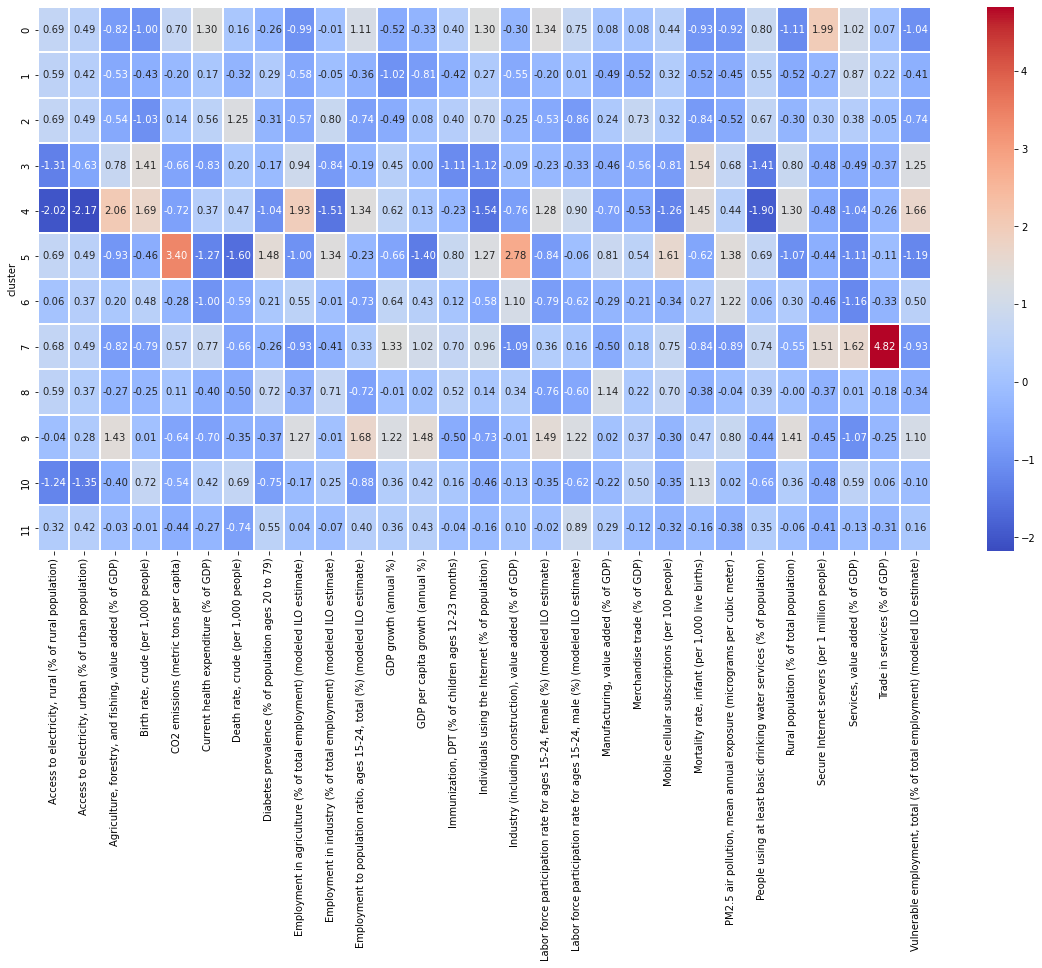

In [29]:
plt.figure(figsize=(20,10))
sns.heatmap(df_cluster_std, cmap="coolwarm", annot=True, fmt= '.2f', linewidths=.2)

Ako nas interesuju konkretne vrednosti, onda nećemo koristiti standardizovanu tabelu __df_cluster_std__ već __df_cluster__. To možemo da prikažemo i kao _DataFrame_.

In [30]:
df_cluster

,"Access to electricity, rural (% of rural population)","Access to electricity, urban (% of urban population)","Agriculture, forestry, and fishing, value added (% of GDP)","Birth rate, crude (per 1,000 people)",CO2 emissions (metric tons per capita),Current health expenditure (% of GDP),"Death rate, crude (per 1,000 people)",Diabetes prevalence (% of population ages 20 to 79),Employment in agriculture (% of total employment) (modeled ILO estimate),Employment in industry (% of total employment) (modeled ILO estimate),...,Merchandise trade (% of GDP),Mobile cellular subscriptions (per 100 people),"Mortality rate, infant (per 1,000 live births)","PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)",People using at least basic drinking water services (% of population),Rural population (% of total population),Secure Internet servers (per 1 million people),"Services, value added (% of GDP)",Trade in services (% of GDP),"Vulnerable employment, total (% of total employment) (modeled ILO estimate)"
cluster,,,,,,,,,,,,,,,,,,,,,
0,100.000000,100.000000,1.957978,10.973750,9.102191,9.719881,8.169812,6.443750,2.462875,19.941562,...,70.288784,123.136018,3.075000,9.497340,99.836597,16.782937,29762.391506,66.126354,26.862459,8.523500
1,96.693553,99.231856,5.005403,16.687000,3.462393,6.725751,6.892000,8.650000,10.893722,19.643944,...,49.372597,119.473816,10.422222,18.680155,95.772643,30.446389,2566.661857,64.453981,31.562587,24.850889
2,99.999206,99.986453,4.892091,10.572333,5.613449,7.764508,11.117792,6.229167,11.163833,26.302625,...,92.931143,119.461274,4.741667,17.275754,97.660824,35.304625,9471.314467,58.755376,23.131088,16.188292
3,32.331356,86.676238,18.806036,35.314056,0.576165,4.094049,8.278000,6.783333,42.304555,13.429444,...,47.984528,83.927835,47.683333,40.740643,64.351459,60.474333,38.753999,48.585221,13.120722,68.310667
4,8.216578,68.304655,32.324122,38.107357,0.225257,7.268319,9.022500,3.335714,62.910928,8.148071,...,49.207919,69.803287,46.078571,36.104928,56.470351,71.835500,9.616838,42.286690,16.787911,79.158929
5,100.000000,100.000000,0.799286,16.357857,25.948789,2.948654,3.420000,13.371429,2.213143,30.581143,...,86.218204,159.727646,8.657143,54.545859,98.032095,17.867429,494.961791,41.421165,21.302681,4.590286
6,78.967099,98.606485,12.733139,25.857818,2.952645,3.660848,6.145818,8.300000,34.297091,19.966636,...,60.247745,98.725142,24.727273,51.268596,87.938982,49.142818,217.683471,40.807118,14.402847,48.763727
7,99.936209,100.000000,1.993004,13.025000,8.274027,8.321418,5.964250,6.425000,3.771250,16.773500,...,73.972453,132.810314,4.625000,10.069645,98.916003,29.590500,24033.857987,73.107802,175.395893,11.375250
8,96.701202,98.530059,7.751567,18.517786,5.406265,5.239011,6.389500,10.342857,15.217714,25.593786,...,75.239829,131.435271,13.107143,26.724136,93.269080,42.100214,1373.317331,54.471340,19.196389,26.641357


Odavde možete da vidite mnoštvo karakteristika klastera, npr. da zemlje četvrtog klastera imaju veoma malu dostupnost električne energije i da su im poljoprivreda i ribarstvo veoma važni za BDP. Ostavljamo vam za samostalni rad da prepoznate karakteristike pojedinačnih klastera. Još je bolje da te opise uparite sa geo-ekonomskim opisom država koje čine taj klaster.

## Smanjenje dimenzionalnosti

Faktorska analiza se koristi kao jedan od načina za smanjenje broja dimenzija u skupu podataka sa kojim radimo. To je dobra praksa jer se tako odstranjuju nepotrebne promenljive i izbacuju one koje nisu nezavisne pa se zbog toga dobijaju pouzdaniji rezultati mašinskog učenja. Tehnički razlozi za smanjenje broja dimenzija su takođe veoma važni. Sa manjim skupom podataka se lakše i brže radi. Osim toga, previše promenljivih može da izazove _over-fitting_ efekat gde procene postaju lošije nego što bi bile da imamo manje promenljivih i jednostavniji model. Konačno, klasterska analiza u prostoru koji ima previše dimenzija može da postane neupotrebljiva zbog nedovoljno velikog uzorka za toliki broj dimenzija. Taj efekat se zove "[prokletstvo multidimenzionalnosti](https://builtin.com/data-science/curse-dimensionality)".  

Mi jesmo tražili rastojanja između tačaka u 29-odimenzionalnom prostoru za potrebe ove demonstracije, ali u opštem slučaju to nije dobra ideja. Smanjenje dimenzionalnosti (eng. _Dimensionality Reduction_) nam otvara mogućnost da radimo klasterizaciju sa manjim brojem promenljivih.

Faktorska analiza može da predstavi faktore kao linearne kombinacije originalnih promenljivih pa da tako dobijemo numeričku vrednost faktora za svaku stavku u uzorku. Funkcija `transform()` koja je definisana za objekat koji smo kreirali za faktorsku analizu daje vrednosti faktora za svaku zemlju iz tabele __df__.

(Napomena: Pošto smo tabeli __df__ dodali _output_ kolonu __cluster__, ovde ćemo morati da je uklonimo jer nam smeta za funkciju `transform()`. To ćemo učiniti pomoću funkcije `drop()`.)

In [31]:
dff=pd.DataFrame(fa.transform(df.drop('cluster',axis=1)),index=df.index,columns=faktori)

Sada možemo da vidimo kolike su procenjene vrednosti (nemerljivih) faktora za koje od ranije imamo opise. Jasno je da su vrednosti faktora "Dostupnost osnovnih konumalnih usluga " značajno veće za Japan i Švedsku nego za Gvajanu i Belize.

In [32]:
dff

,Dostupnost osnovnih\n komunalnih usluga,Zapošljivost mladih,Ukupni ekonomski rast,Industrijski razvoj,Zdravstvena situacija,Mogućnosti proizvodnje i\n trgovine proizvedenom robom,Razvoj stručnih usluga
Japan,1.196671,1.106999,-0.773557,0.575415,-1.057153,0.011181,-0.658923
Singapore,1.064105,-0.283831,0.722790,0.143804,-0.536978,0.034265,3.113480
Denmark,1.094715,1.596332,-0.473175,-0.303366,-1.101224,0.046984,0.748569
Sweden,1.202531,0.705392,-0.315946,-0.284938,-0.986455,-0.589225,0.459900
Switzerland,1.261336,2.159149,-0.390354,0.348852,-0.942996,-0.035474,0.327216
...,...,...,...,...,...,...,...
Mexico,0.612074,0.662143,-0.173644,0.198161,0.841820,0.025678,-0.845944
Guyana,0.014020,0.317846,0.350793,-0.170929,0.599676,0.524632,-0.666206
Guatemala,0.152898,1.096803,0.303419,-0.366806,1.132194,-0.107574,-0.666105
Nicaragua,-0.247150,0.492555,0.609117,-0.363825,0.833389,0.205555,-0.389789


Pošto su nam prva dva faktora najznačajnija možemo da nacrtamo tačkasti dijagram gde će na x-osi biti prvi faktor, a na y drugi. Svaka tačka bi predstavila jednu zemlju, a njena boja klaster kom pripada. Ukoliko faktori imaju smisla trebalo bi da prepoznamo grupisanje tačaka iz istog klastera.

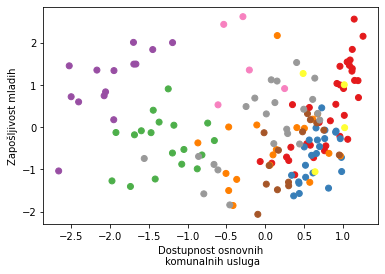

In [33]:
prva=faktori[0]
druga=faktori[1]
plt.scatter(x=dff[prva],y=dff[druga],c=df['cluster'],cmap="Set1")
plt.xlabel(prva)
plt.ylabel(druga);

Pošto tačke ne možemo da prikažemo u sedmodimenzionalnom prostoru, ostaje nam mogućnost da ih prikažemo za dve po dve dimenzije, tj. da nađemo sve parove faktora. Biblioteka __seaborn__ ima funkciju koja može u tome da nam pomogne: `pairplot()`.

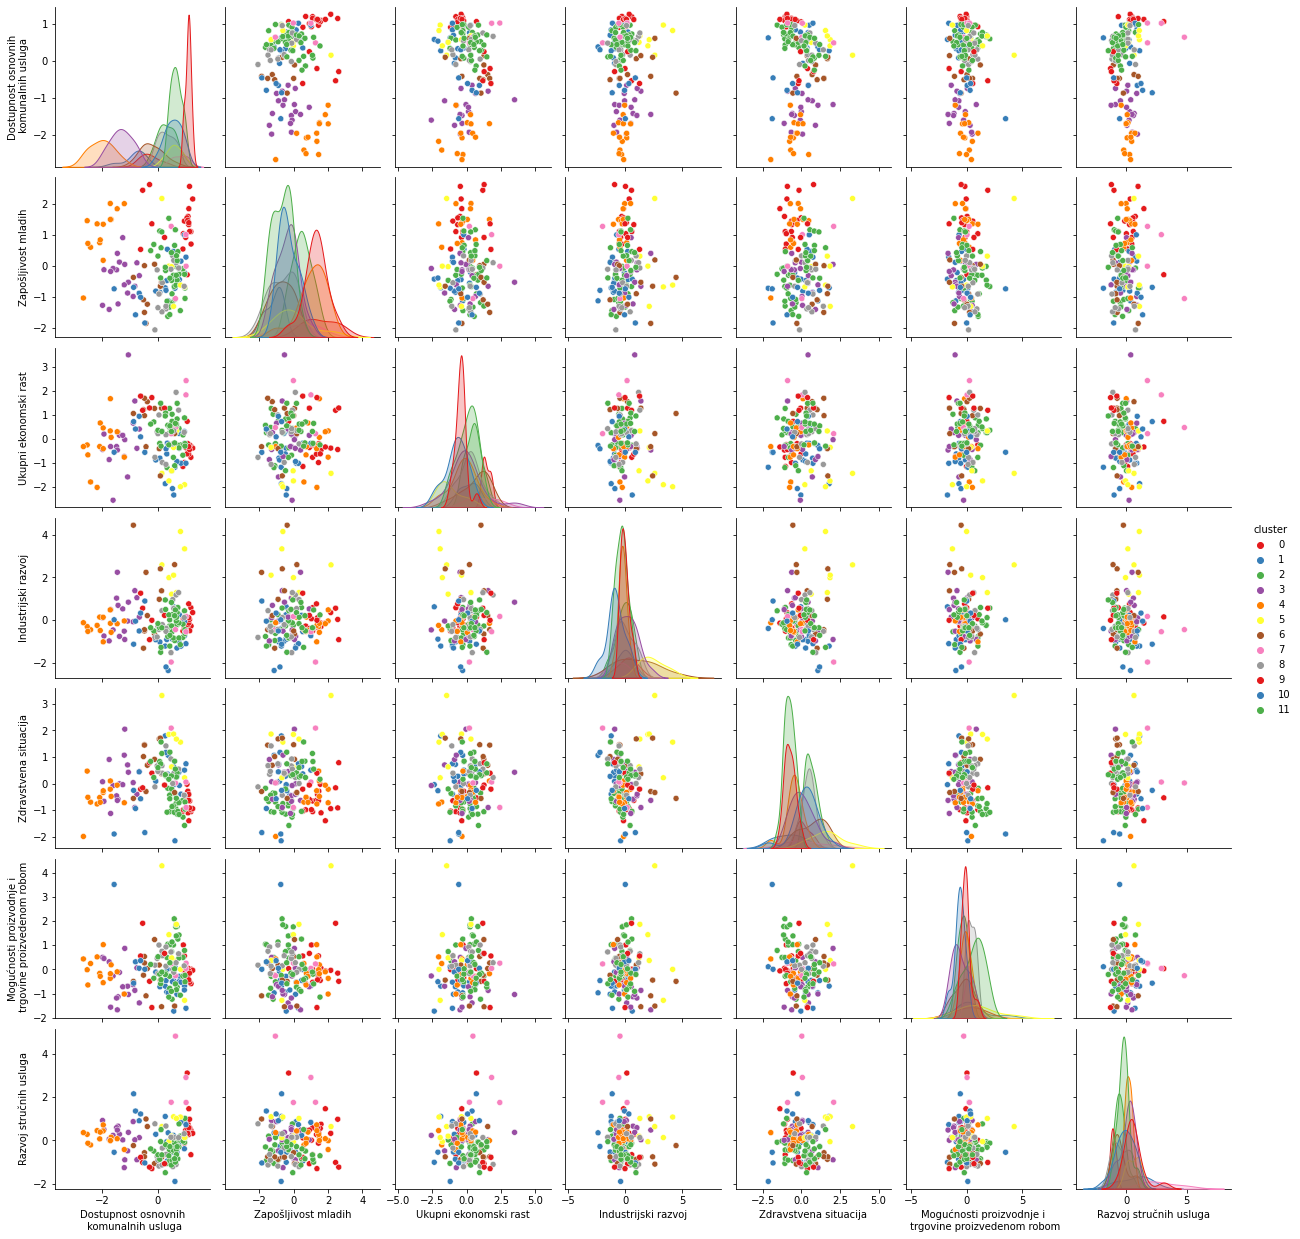

In [34]:
dff['cluster']=df['cluster']

sns.pairplot(dff,kind='scatter',hue='cluster',palette="Set1");

Sa ovog grafikona vidimo da ne postoji jasna linearna veza između bilo koja dva faktora. To znači da su faktori prilično nezavisni i da smo napravili dobar izbor.

## Zaključak

Hijerarhijska klasterizacija je kompleksan algoritam koji postaje previše spor za veliki broj stavki. Ipak, za male i srednje velike skupove podataka predstavlja odličan izbor modela za mašinsko učenje bez nadzora. Paterni koje pronalazimo na ovaj način mogu da se objasne i da omoguće bolji uvid u podatke i pojave koje ih uzrokuju. Dodatna vrednost ovog modela je što može dobro da se vizuelizuje pa samim tima i da se rezultati bolje komuniciraju sa ciljnom grupom.